In [ ]:
# Установка пакетов oligo, oligoData
# Можно этот пункт пропустить, если у Вас пакеты
# oligo и oligoData установлены
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("oligo")
BiocManager::install("oligoData")
BiocManager::install("ggplot2")

In [1]:
library("oligo")
library("oligoData")
library('ggplot2')
data(affyExpressionFS)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: oligoClasses

Welcome to oligoClasses version 1.50.0

Loading required package: Bi

In [2]:
affyExpressionFS

Loading required package: pd.hg.u95av2

Loading required package: RSQLite

Loading required package: DBI



ExpressionFeatureSet (storageMode: lockedEnvironment)
assayData: 409600 features, 59 samples 
  element names: exprs 
protocolData: none
phenoData
  rowNames: 1521a99hpp_av06.CEL 1521b99hpp_av06.CEL ...
    2353t99hpp_av08.CEL (59 total)
  varLabels: exprs
  varMetadata: labelDescription channel
featureData: none
experimentData: use 'experimentData(object)'
Annotation: pd.hg.u95av2 

### MVA plot
The plot visualizes the differences between measurements taken in two samples, by transforming the data onto M (log ratio) and A (mean average) scales, then plotting these values


Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”
Warning message in bxp(list(stats = structure(c(-0.135347051102979, -0.0331175180215295, :
“Duplicated argument xlim = c(2.8, 4) is disregarded”
Warning message in bxp(list(stats = structure(c(-0.152334393594827, -0.0411056977553383, :
“Duplicated argument xlim = c(2.8, 4) is disregarded”
Warning message in bxp(list(stats = structure(c(-0.133431843665705, -0.0281821993530849, :
“Duplicated argument xlim = c(2.8, 4) is disregarded”


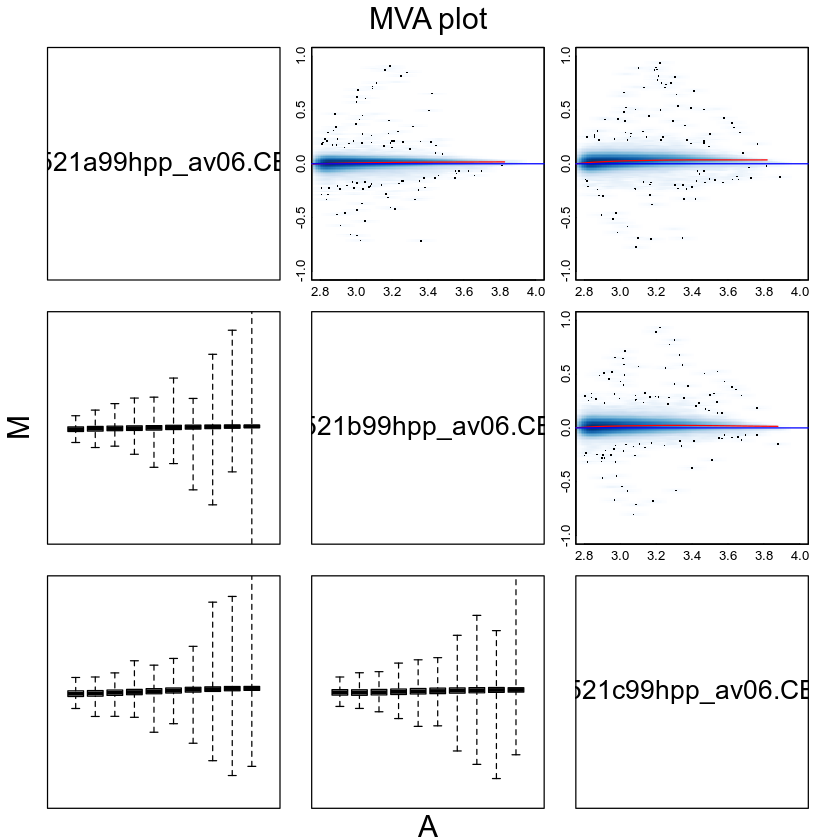

In [3]:
# MVA plot
xl <- c(2.8, 4)
yl <- c(-1, 1)
MAplot(affyExpressionFS[, 1:3], pairs=TRUE, ylim=yl, xlim=xl)

### Density plot
Гистограма экспресии. У всех файлов должно быть примерно одинаковое распределение

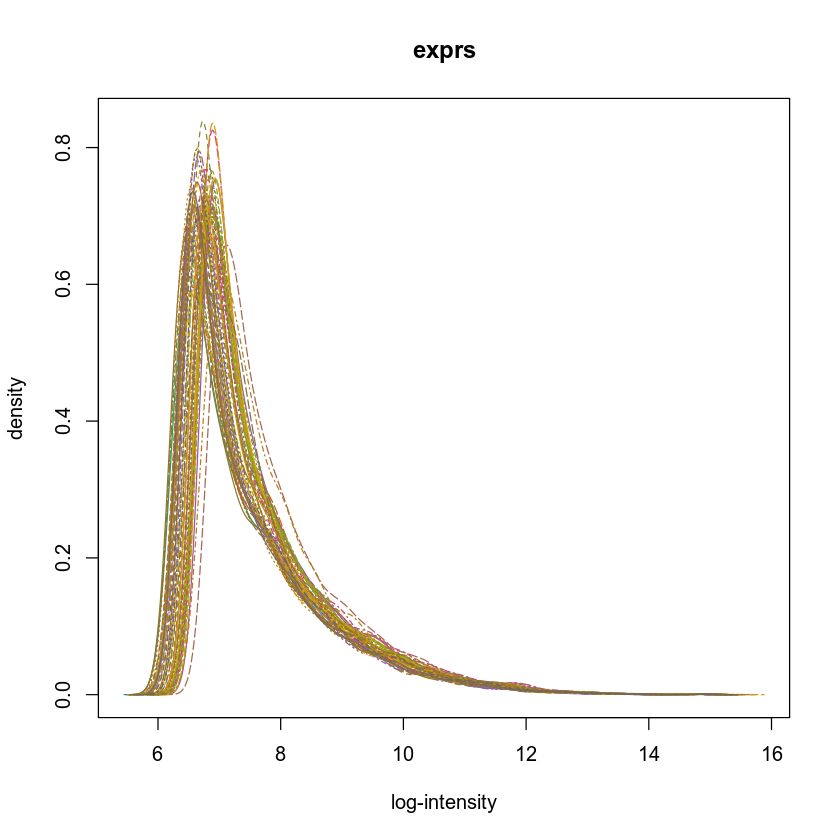

In [4]:
# Density plot
hist(affyExpressionFS)

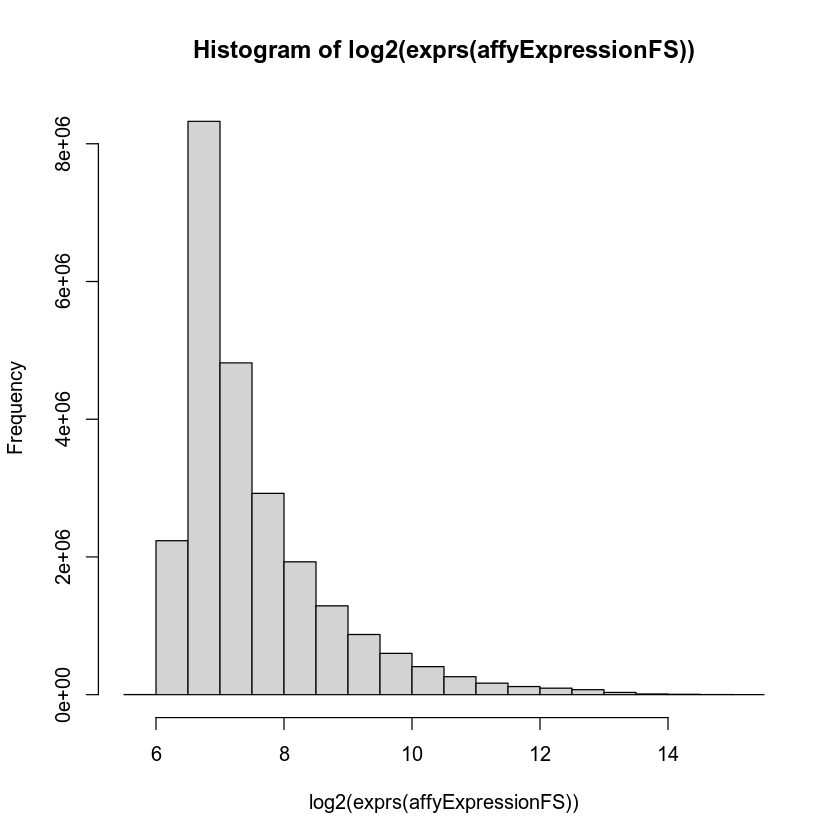

In [5]:
# Alternative plot
hist(log2(exprs(affyExpressionFS)))

### Boxplot
Аналог Density plot, все файлы должны иметь примерно одинаковые квартили и среднее

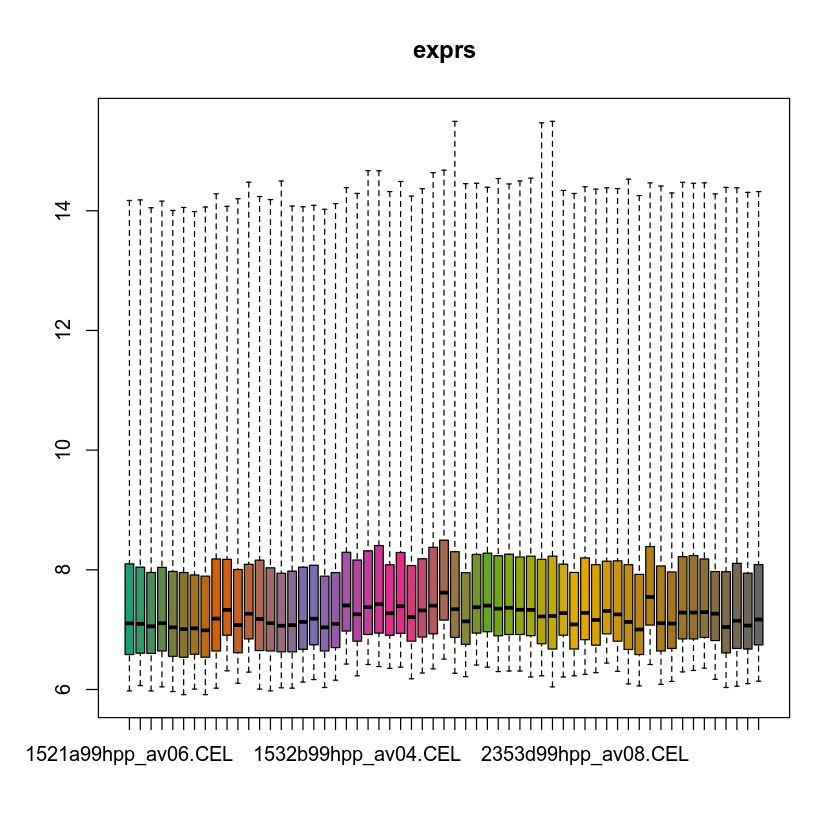

In [6]:
# Boxplot
boxplot(affyExpressionFS)

### PCA

Анализ главных компонент

In [3]:
eset_log <- exprs(affyExpressionFS)
eset_log <- log2(eset_log)
eset_log

,1521a99hpp_av06.CEL,1521b99hpp_av06.CEL,1521c99hpp_av06.CEL,1521d99hpp_av06.CEL,1521e99hpp_av06.CEL,1521f99hpp_av06.CEL,1521g99hpp_av06.CEL,1521h99hpp_av06.CEL,1521i99hpp_av06.CEL,1521j99hpp_av06.CEL,⋯,2353k99hpp_av08.CEL,2353l99hpp_av08.CEL,2353m99hpp_av08.CEL,2353n99hpp_av08.CEL,2353o99hpp_av08.CEL,2353p99hpp_av08.CEL,2353q99hpp_av08.CEL,2353r99hpp_av08.CEL,2353s99hpp_av08.CEL,2353t99hpp_av08.CEL
1,8.139551,7.761551,7.515700,7.761551,7.734710,7.592457,7.507795,7.839204,7.721099,8.033423,⋯,7.303781,7.189825,7.238405,7.483816,7.426265,7.912889,7.044394,7.483816,7.011227,7.451211
2,13.185309,13.089914,12.921097,13.125575,13.123362,12.969926,12.817643,13.047175,13.283494,13.216488,⋯,12.619074,12.594441,12.801102,12.732973,12.819880,12.522827,12.839302,13.029684,12.919664,12.954105
3,7.982994,8.033423,7.721099,7.894818,7.813781,7.562242,7.515700,7.900867,8.011227,8.066089,⋯,7.199672,7.169925,7.426265,7.409391,7.483816,7.491853,7.209453,7.483816,7.139551,7.451211
4,13.140989,13.088457,12.906327,13.163650,13.130892,12.950920,12.842940,13.086966,13.279901,13.215685,⋯,12.640697,12.645884,12.703904,12.855219,12.810772,12.560572,12.834471,13.051039,12.929628,12.961992
5,6.898450,6.774787,6.562242,6.607330,6.589464,6.758889,7.069315,6.741467,6.934281,6.849249,⋯,7.184875,6.397461,6.584963,6.523562,6.523562,7.122051,6.431289,6.554589,6.459432,6.380245
6,8.076816,7.988685,7.499846,7.954196,7.912889,7.761551,7.870365,7.900867,7.870365,8.033423,⋯,8.960002,7.348728,7.451211,7.326429,7.507795,7.426265,7.179909,7.499846,7.330917,7.321928
7,13.098526,13.058499,12.825158,13.115856,13.092592,12.919050,12.772521,13.082315,13.254291,13.142267,⋯,12.236612,12.391781,12.442684,12.579080,12.500344,12.359750,12.428884,12.863993,12.864380,12.814382
8,7.899659,7.738092,7.370687,7.663914,7.750205,7.368943,7.233620,7.523562,7.828454,7.828454,⋯,7.147714,7.483816,7.810572,7.564531,7.539159,7.370687,7.058533,7.108524,6.963474,7.172927
9,13.078318,13.067737,12.864283,13.113058,13.065753,12.879009,12.815984,13.015067,13.267518,13.159871,⋯,12.260332,12.394731,12.445092,12.555907,12.440091,12.328955,12.436712,12.867279,12.888648,12.862928
10,7.761551,7.842350,7.581201,7.660353,7.413628,7.348728,7.294621,7.451211,7.761551,7.888743,⋯,7.303781,7.285402,7.364572,7.400879,7.475733,7.577429,7.129283,7.179909,7.159871,7.351381


In [48]:
# Уменьшаем кол-во данных, потому что их слишком много))
edge <- nrow(eset_log) / 20
small_eset <- eset_log[1:edge, 1:ncol(eset_log)] 
nrow(small_eset)

[1] 20480

In [49]:
PCA_raw <- prcomp(t(small_eset), scale. = FALSE)

In [50]:
se <- PCA_raw$sdev^2
percentVar <- round(100 * se / sum(se), 1)
percentVar

[1] 41.6 11.6  6.0  3.9  3.6  2.4  2.0  1.6  1.5  1.3  1.1  1.0  1.0  0.9  0.9
[16]  0.8  0.8  0.7  0.7  0.6  0.6  0.6  0.6  0.6  0.6  0.5  0.5  0.5  0.5  0.5
[31]  0.5  0.5  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4
[46]  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.0

In [51]:
dataGG <- data.frame(PC1 = PCA_raw$x[,1], PC2 = PCA_raw$x[,2])
dataGG

,PC1,PC2
,<dbl>,<dbl>
1521a99hpp_av06.CEL,-1.25240706,-13.4542938
1521b99hpp_av06.CEL,-1.09692881,-13.2673983
1521c99hpp_av06.CEL,-16.95302073,-13.1047604
1521d99hpp_av06.CEL,-8.49030854,-11.9121297
1521e99hpp_av06.CEL,-27.17248331,-18.5568944
1521f99hpp_av06.CEL,-31.40193724,-10.8954315
1521g99hpp_av06.CEL,-35.39545809,-8.8942529
1521h99hpp_av06.CEL,-18.63212149,-10.9794022
1521i99hpp_av06.CEL,12.91972455,-25.8717542


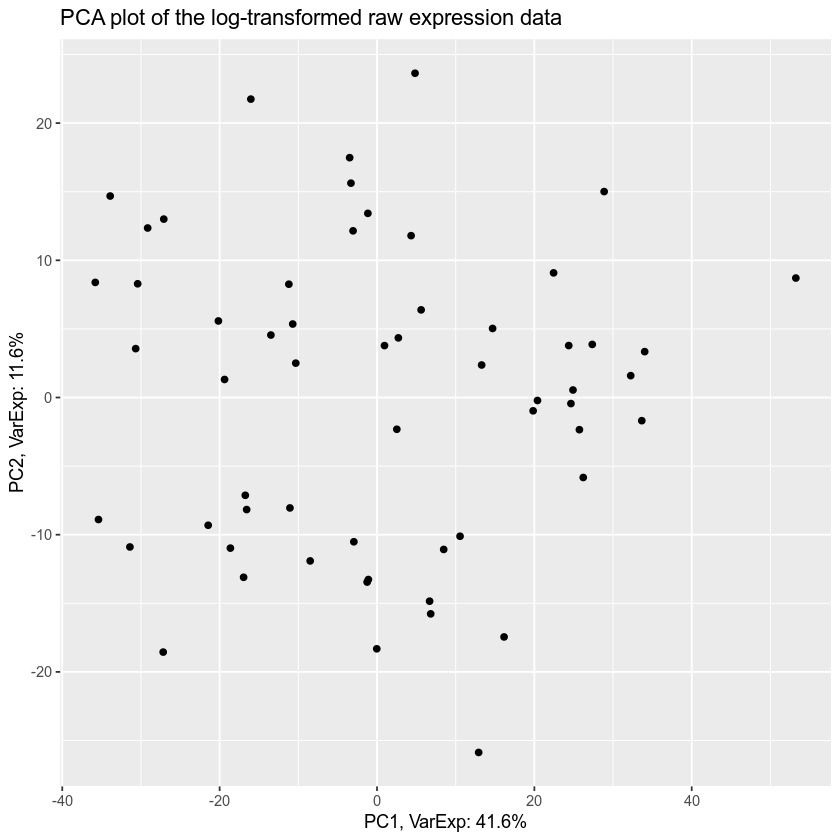

In [58]:
ggplot(dataGG, aes(PC1, PC2)) +
geom_point()+
ggtitle("PCA plot of the log-transformed raw expression data") + 
xlab(paste0("PC1, VarExp: ", percentVar[1], "%")) + 
ylab(paste0("PC2, VarExp: ", percentVar[2], "%"))

### RLE

In [2]:
eset_rma <- rma(affyExpressionFS, normalize = FALSE)
eset_rma

Loading required package: RSQLite

Loading required package: DBI



Background correcting
Calculating Expression


ExpressionSet (storageMode: lockedEnvironment)
assayData: 12625 features, 59 samples 
  element names: exprs 
protocolData: none
phenoData
  rowNames: 1521a99hpp_av06.CEL 1521b99hpp_av06.CEL ...
    2353t99hpp_av08.CEL (59 total)
  varLabels: exprs
  varMetadata: labelDescription channel
featureData: none
experimentData: use 'experimentData(object)'
Annotation: pd.hg.u95av2 

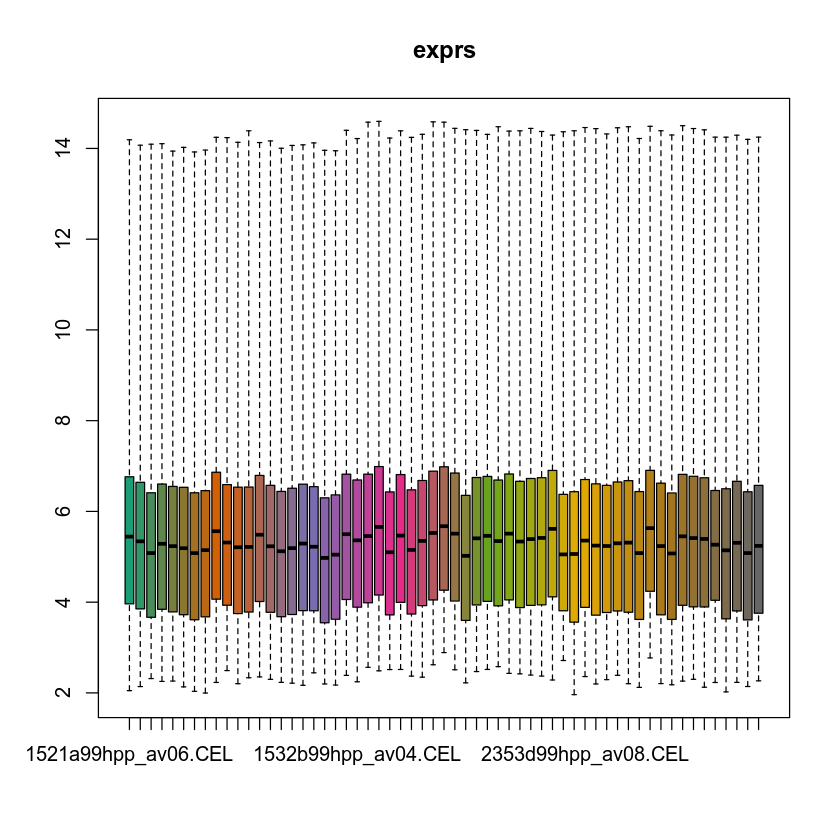

In [3]:
boxplot(eset_rma)

In [4]:
row_medians_assayData <-
    Biobase::rowMedians(as.matrix(Biobase::exprs(affyExpressionFS)))

RLE_data <- sweep(Biobase::exprs(affyExpressionFS), 1, row_medians_assayData)
RLE_data <- as.data.frame(RLE_data)

In [5]:
RLE_data_gather <- tidyr::gather(RLE_data, patient_array, log2_expression_deviation)
RLE_data_gather

patient_array,log2_expression_deviation
<chr>,<dbl>
1521a99hpp_av06.CEL,90.0
1521a99hpp_av06.CEL,850.5
1521a99hpp_av06.CEL,58.0
1521a99hpp_av06.CEL,474.0
1521a99hpp_av06.CEL,17.0
1521a99hpp_av06.CEL,67.7
1521a99hpp_av06.CEL,421.0
1521a99hpp_av06.CEL,53.3
1521a99hpp_av06.CEL,371.0


Warning message:
“Removed 21820847 rows containing non-finite values (stat_boxplot).”


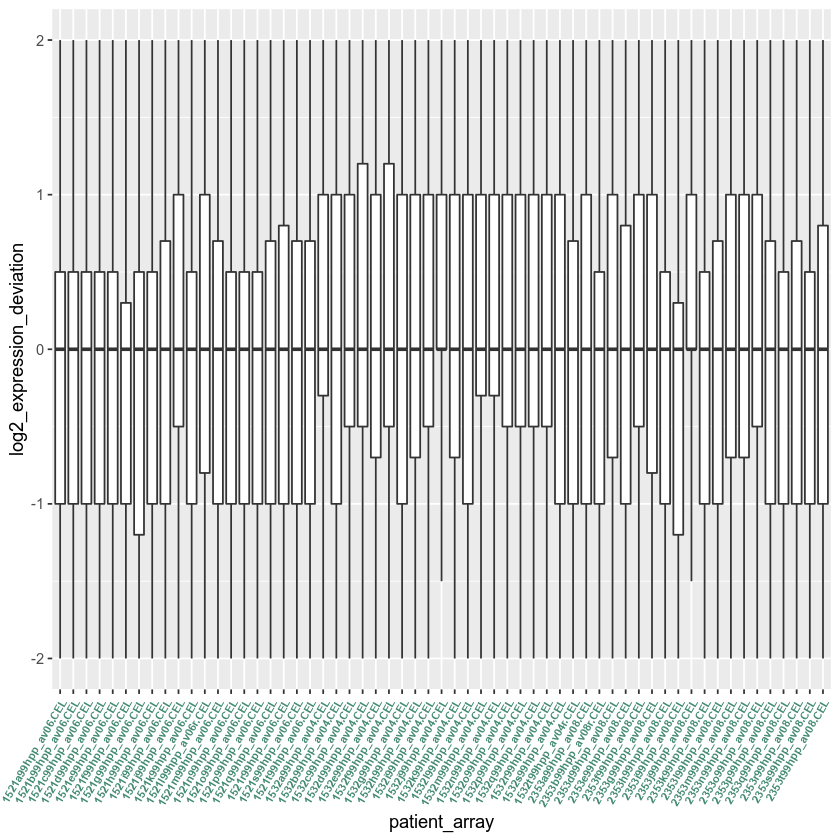

In [6]:
ggplot2::ggplot(RLE_data_gather, aes(patient_array, log2_expression_deviation)) +
geom_boxplot(outlier.shape = NA) + 
ylim(c(-2, 2)) + 
theme(axis.text.x = element_text(colour = "aquamarine4", 
                                  angle = 60, size = 6.5, hjust = 1 ,
                                  face = "bold"))